In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv', index_col='file')
df = df[~df.index.isin(['vmlinux.bc'])]
# df = df[~df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc'])]
# df = df[df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc', 'postgres.bc'])]
df.columns

Index(['ptagpu total', 'ptagpu analysis', 'svf init', 'cuda init + dealloc',
       'update_pts kernel', 'main kernel', 'thrust sort', 'store kernel',
       'async gep+ind', 'svf geps', 'svf inds', 'used GPU memory MiB',
       'bitcode filesize MB', 'wavediff total', 'wazediff analysis',
       'naive ander', 'speedup', 'diff', 'num nodes', 'num edges',
       'ptagpu time scientific', 'wavediff scientific', 'Unnamed: 23',
       'file again', 'a100 ptagpu total', 'a100 ptagpu analysis',
       'a100 svf init', 'a100 cuda init + dealloc', 'a100 update_pts kernel',
       'a100 main kernel', 'a100 thrust sort', 'a100 store kernel',
       'a100 async gep+ind', 'a100 svf geps', 'a100 svf inds'],
      dtype='object')

In [ ]:
df['speedup'] = df['wavediff total']/df['ptagpu total']
df['a100 speedup'] = df['wavediff total']/df['a100 ptagpu total']

df['a100 speedup']

file
bash.bc            1.235847
bison.bc           2.497203
diff.bc            0.444550
git.bc             0.641841
htop.bc            0.721199
httpd.bc           1.127297
nano.ll            0.053760
perl.bc            2.469035
php.bc             1.291172
postgres.bc        3.436562
python.bc          3.106615
redis-server.bc    0.982908
vim.bc             4.248365
vmlinux-tiny.bc    0.671832
zstd.bc            1.129471
Name: a100 speedup, dtype: float64

In [ ]:
df['diff'] = df['wavediff total'] - df['ptagpu total']
df['diff']

file
bash.bc            7.331130e+02
bison.bc           9.140316e+03
diff.bc           -2.762524e+03
git.bc            -4.132046e+06
htop.bc           -2.362817e+03
httpd.bc          -1.093059e+03
nano.ll           -1.663572e+03
perl.bc            5.824542e+04
php.bc            -6.435430e+07
postgres.bc        5.318287e+05
python.bc          3.328665e+05
redis-server.bc   -2.913356e+03
vim.bc             7.843675e+05
vmlinux-tiny.bc   -9.683530e+04
zstd.bc           -2.109386e+03
Name: diff, dtype: float64

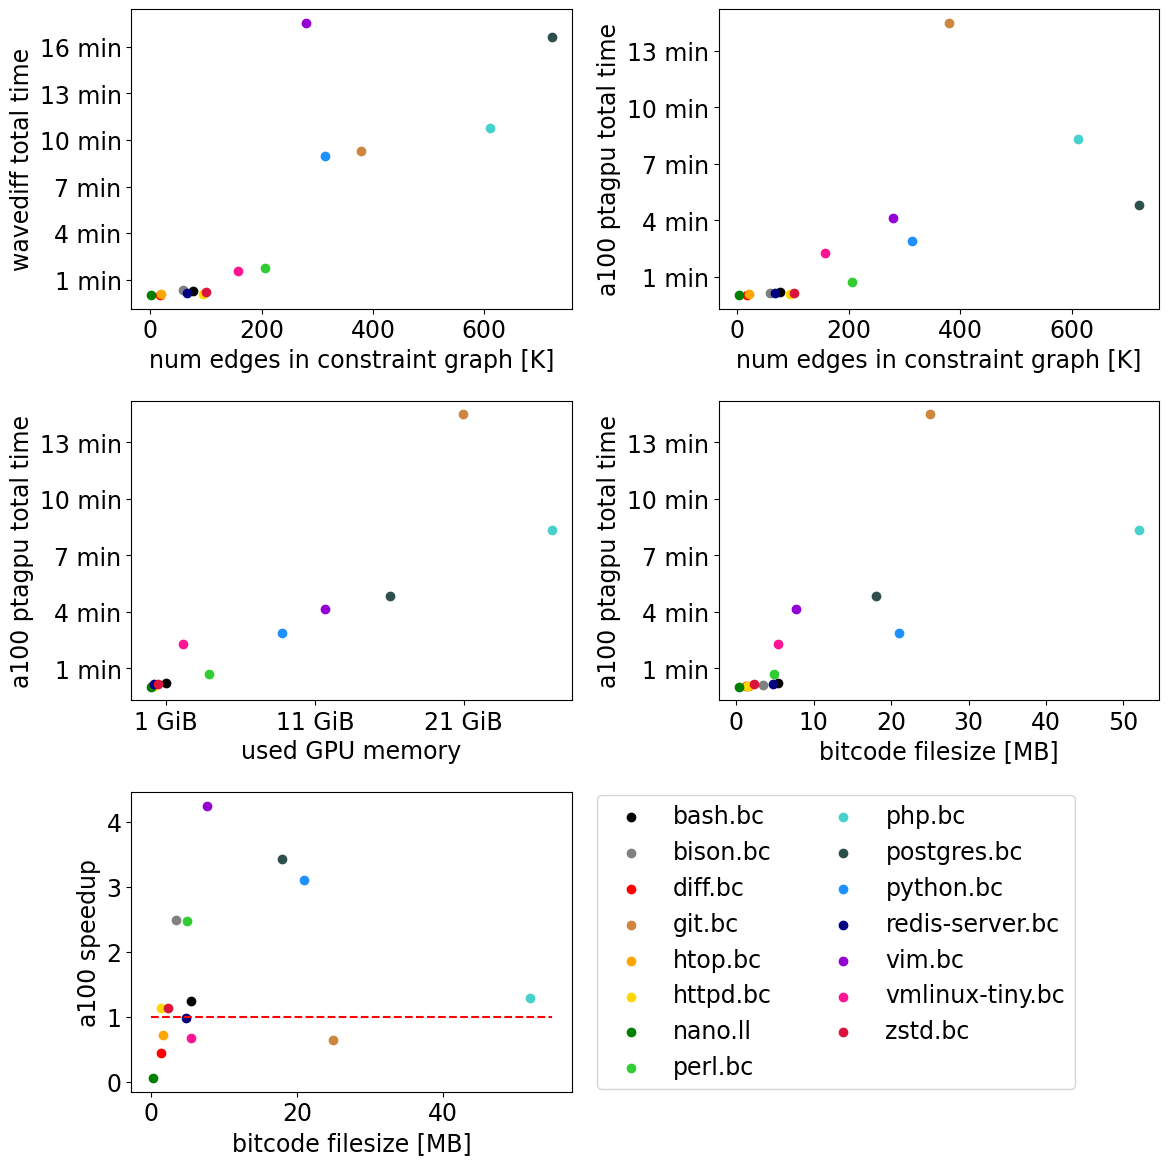

In [ ]:
# df.plot.scatter(x='filesize', y=df.columns[0])
from matplotlib import colors

color_list = list(colors.CSS4_COLORS)
color_list = ['black',
 'gray',
 'red',
 'peru',
 'orange',
 'gold',
 'green',
 'limegreen',
 'mediumturquoise',
 'darkslategray',
 'dodgerblue',
 'navy',
 'darkviolet',
 'deeppink',
 'crimson',
 'maroon']

plt.rc('font', size=17) 

fig = plt.figure(figsize=(12,12))

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

yticks = [60000*i for i in range(1, 20, 3)]
ylabels = [f"{i} min" for i in range(1, 20, 3)]


# axes[1,1].ticklabel_format(style='sci')
plt.gcf().set_dpi(100)

ax1 = fig.add_subplot(3,2,1)
ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xlabel('num edges in constraint graph [K]')
ax1.set_ylabel('wavediff total time')
# df.plot.scatter(ax=axes[0,0], x='num edges', y='wavediff total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax1.scatter(x=row['num edges'], y=row['wavediff total'], label=ticker, c=color_list[i])

ax2 = fig.add_subplot(3,2,2)
ax2.set_yticks(yticks)
ax2.set_yticklabels(ylabels)
ax2.set_xlabel('num edges in constraint graph [K]')
ax2.set_ylabel('a100 ptagpu total time')
# df.plot.scatter(ax=axes[0,1], x='num edges', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax2.scatter(x=row['num edges'], y=row['a100 ptagpu total'], label=ticker, c=color_list[i])

ax3 = fig.add_subplot(3,2,3)
ax3.set_xticks([1024*i for i in range(1,200, 10)])
ax3.set_xticklabels([f"{i} GiB" for i in range(1,200, 10)])
ax3.set_yticks(yticks)
ax3.set_yticklabels(ylabels)
ax3.set_xlabel('used GPU memory')
ax3.set_ylabel('a100 ptagpu total time')
# df.plot.scatter(ax=axes[1,0], x='used GPU memory MiB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax3.scatter(x=row['used GPU memory MiB'], y=row['a100 ptagpu total'], label=ticker, c=color_list[i])

ax4 = fig.add_subplot(3,2,4)
ax4.set_yticks(yticks)
ax4.set_yticklabels(ylabels)
ax4.set_xlabel('bitcode filesize [MB]')
ax4.set_ylabel('a100 ptagpu total time')
# df.plot.scatter(ax=axes[1,1], x='bitcode filesize MB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax4.scatter(x=row['bitcode filesize MB'], y=row['a100 ptagpu total'], label=ticker, c=color_list[i])

ax5 = fig.add_subplot(3,2,5)
# ax5.set_yticks(yticks)
# ax5.set_yticklabels(ylabels)
ax5.set_xlabel('bitcode filesize [MB]')
ax5.set_ylabel('a100 speedup')
# df.plot.scatter(ax=axes[2,0], x='bitcode filesize MB', y='a100 speedup', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax5.scatter(x=row['bitcode filesize MB'], y=row['a100 speedup'], label=ticker, c=color_list[i])

ax5.plot([0,55],[1,1], '--', c='r')
# df.plot.scatter(ax=axes[2,1], x='bitcode filesize MB', y='diff', c=color_list[0:len(df.index)])
# axes[2,1].set_yscale("log")
fig.tight_layout()

ax5.legend(bbox_to_anchor=(1.6, 0.5), loc='center', borderaxespad=0, ncol=2)

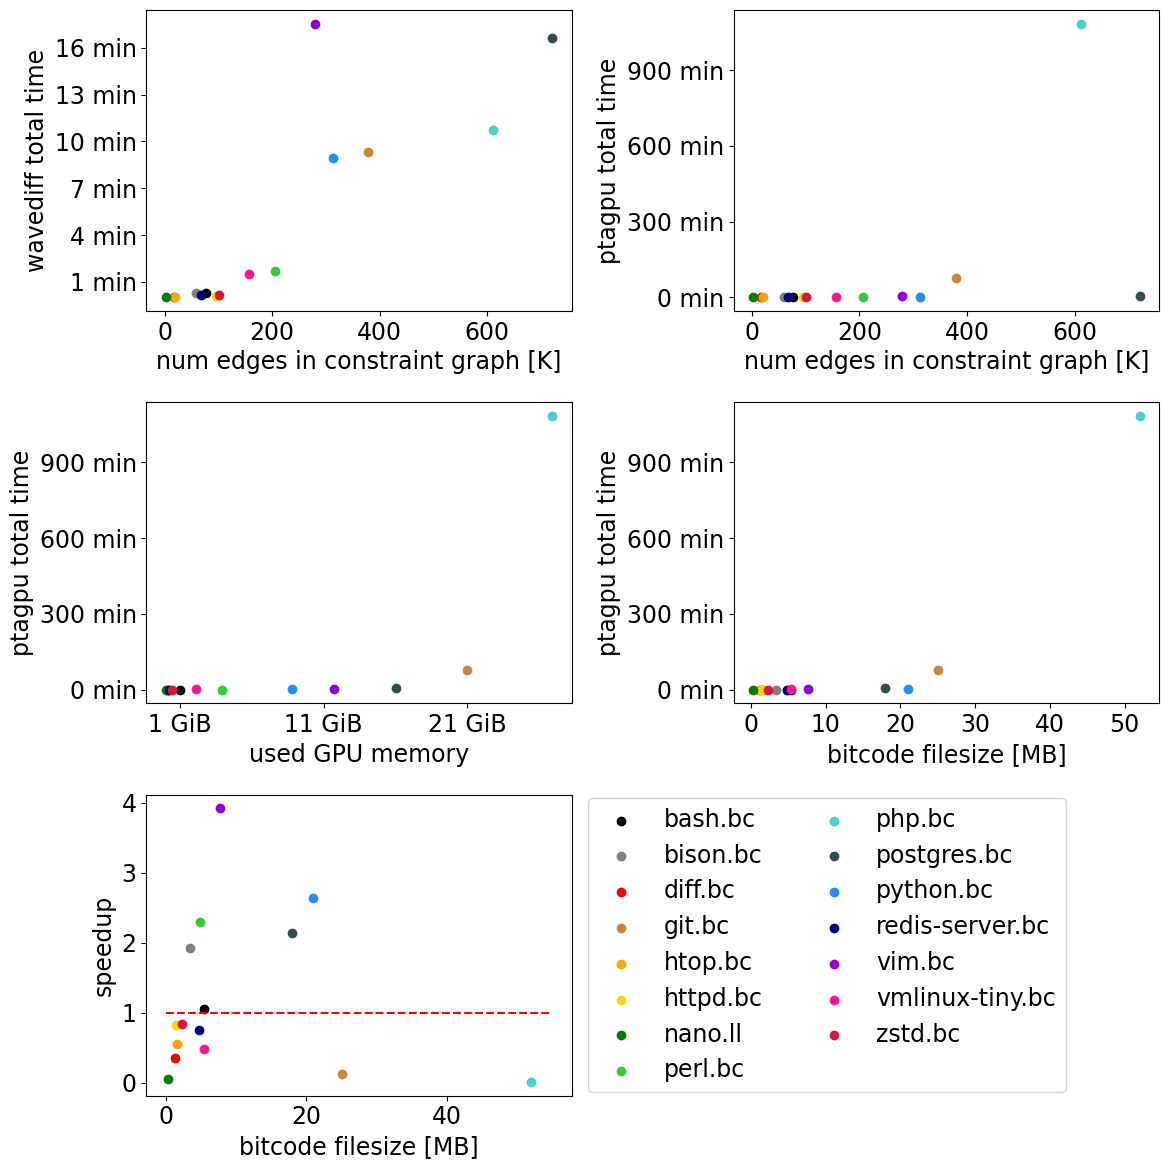

In [ ]:
# df.plot.scatter(x='filesize', y=df.columns[0])
from matplotlib import colors

# remove overflowing data
# df = df[~df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc'])]

color_list = list(colors.CSS4_COLORS)
color_list = ['black',
 'gray',
 'red',
 'peru',
 'orange',
 'gold',
 'green',
 'limegreen',
 'mediumturquoise',
 'darkslategray',
 'dodgerblue',
 'navy',
 'darkviolet',
 'deeppink',
 'crimson',
 'maroon']


plt.rc('font', size=17) 
fig = plt.figure(figsize=(12,12))

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

yticks = [60000*i for i in range(0, 2000, 300)]
ylabels = [f"{i} min" for i in range(0, 2000, 300)]


# axes[1,1].ticklabel_format(style='sci')
plt.gcf().set_dpi(100)

ax1 = fig.add_subplot(3,2,1)
ax1.set_yticks([60000*i for i in range(1, 20, 3)])
ax1.set_yticklabels([f"{i} min" for i in range(1, 20, 3)])
ax1.set_xlabel('num edges in constraint graph [K]')
ax1.set_ylabel('wavediff total time')
# df.plot.scatter(ax=axes[0,0], x='num edges', y='wavediff total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax1.scatter(x=row['num edges'], y=row['wavediff total'], label=ticker, c=color_list[i])

ax2 = fig.add_subplot(3,2,2)
ax2.set_yticks(yticks)
ax2.set_yticklabels(ylabels)
ax2.set_xlabel('num edges in constraint graph [K]')
ax2.set_ylabel('ptagpu total time')
# df.plot.scatter(ax=axes[0,1], x='num edges', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax2.scatter(x=row['num edges'], y=row['ptagpu total'], label=ticker, c=color_list[i])

ax3 = fig.add_subplot(3,2,3)
ax3.set_xticks([1024*i for i in range(1,200, 10)])
ax3.set_xticklabels([f"{i} GiB" for i in range(1,200, 10)])
ax3.set_yticks(yticks)
ax3.set_yticklabels(ylabels)
ax3.set_xlabel('used GPU memory')
ax3.set_ylabel('ptagpu total time')
# df.plot.scatter(ax=axes[1,0], x='used GPU memory MiB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax3.scatter(x=row['used GPU memory MiB'], y=row['ptagpu total'], label=ticker, c=color_list[i])

ax4 = fig.add_subplot(3,2,4)
ax4.set_yticks(yticks)
ax4.set_yticklabels(ylabels)
ax4.set_xlabel('bitcode filesize [MB]')
ax4.set_ylabel('ptagpu total time')
# df.plot.scatter(ax=axes[1,1], x='bitcode filesize MB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax4.scatter(x=row['bitcode filesize MB'], y=row['ptagpu total'], label=ticker, c=color_list[i])

ax5 = fig.add_subplot(3,2,5)
# ax5.set_yticks(yticks)
# ax5.set_yticklabels(ylabels)
ax5.set_xlabel('bitcode filesize [MB]')
ax5.set_ylabel('speedup')
# df.plot.scatter(ax=axes[2,0], x='bitcode filesize MB', y='a100 speedup', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax5.scatter(x=row['bitcode filesize MB'], y=row['speedup'], label=ticker, c=color_list[i])

ax5.plot([0,55],[1,1], '--', c='r')
# df.plot.scatter(ax=axes[2,1], x='bitcode filesize MB', y='diff', c=color_list[0:len(df.index)])
# axes[2,1].set_yscale("log")
fig.tight_layout()

ax5.legend(bbox_to_anchor=(1.6, 0.5), loc='center', borderaxespad=0, ncol=2)

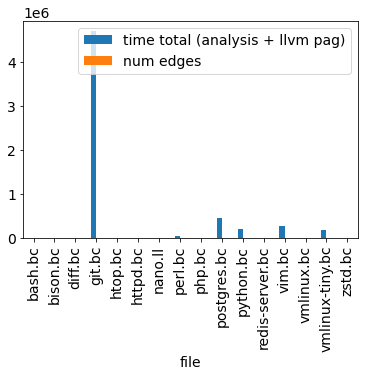

In [ ]:
df[[df.columns[0],df.columns[-3]]].plot.bar()

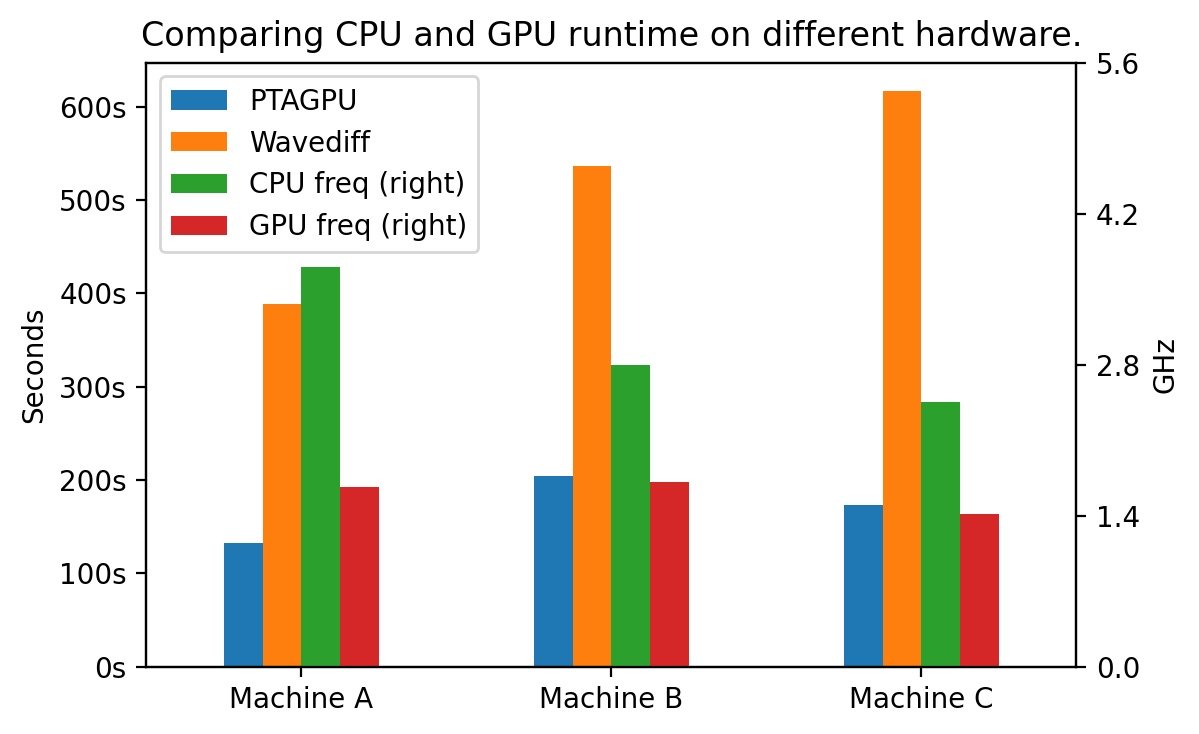

In [ ]:
plt.rc('font', size=10) 
import pandas as pd

data = {
    "PTAGPU": [132126, 203649, 172701],
    "Wavediff": [388669, 536515, 616315],
    "CPU freq": [3.70, 2.80, 2.45],
    "GPU freq": [1.665, 1.710, 1.410],
}

df = pd.DataFrame(data)

ax = df.plot(kind='bar', secondary_y=["CPU freq", "GPU freq"], figsize=(6,4))
ax.set_title('Comparing CPU and GPU runtime on different hardware.')
ax.set_xticks(df.index)
ax.set_xticklabels(['Machine A','Machine B','Machine C'], rotation=0)
ax.set_yticks([i*1000 for i in range(0, 700, 100)])
ax.set_yticklabels([f"{i}s" for i in range(0, 700, 100)])
ax.set_ylabel('Seconds')
plt.ylabel("GHz")
plt.yticks([1.4*i for i in range(5)])
plt.gcf().set_dpi(200)


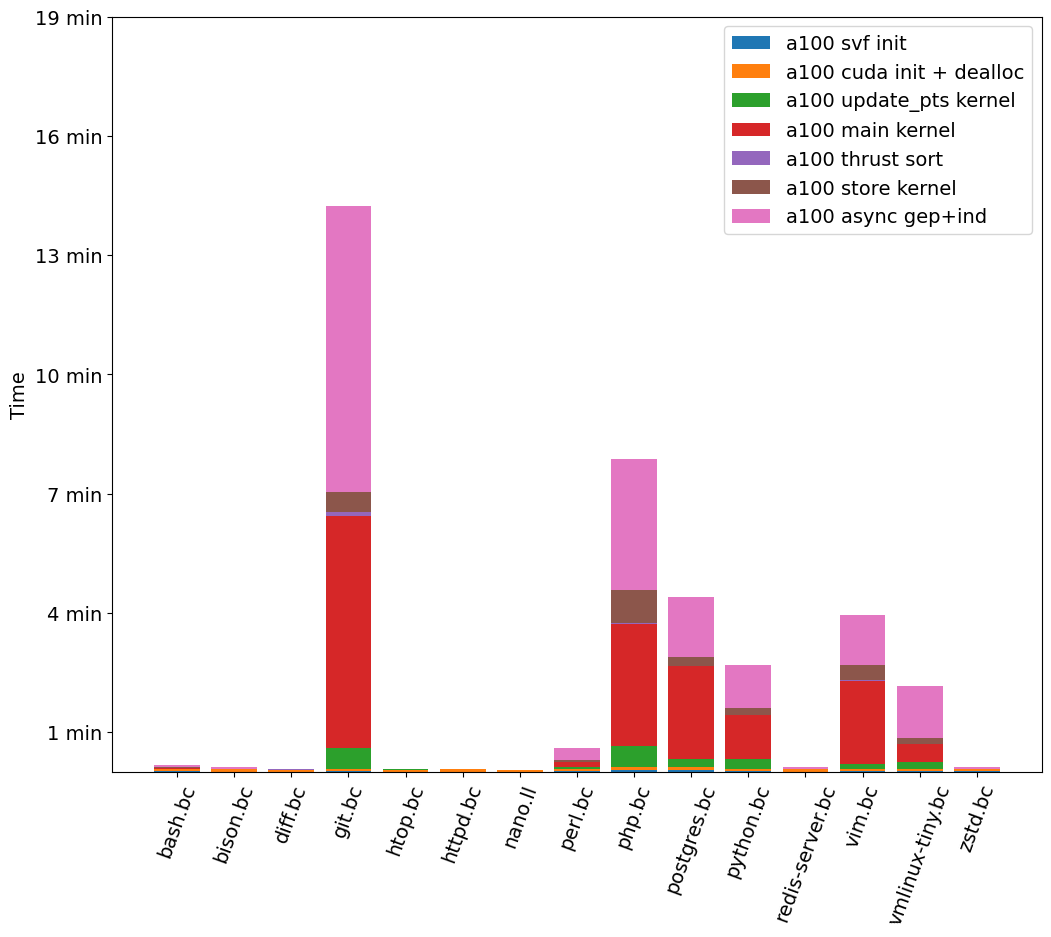

In [ ]:
plt.rc('font', size=14)
cumval=0
fig = plt.figure(figsize=(12,10))
plt.gcf().set_dpi(100)
# df_s = df.sort_values(by = 'a100 ptagpu total')
df_s = df
for col in df_s[df_s.columns[-10:-3]]:
    plt.bar(df_s.index, df_s[col], bottom=cumval, label=col)
    cumval = cumval+df_s[col]

_ = plt.xticks(rotation=70)
_ = plt.legend(fontsize=14)
_ = plt.ylabel('Time')
# _ = plt.yticks([120000, 240000, 360000], ["2min", "4min", "6min"])

# _ = plt.yticks([3600000*i for i in range(0, 20, 3)], [f"{i}h" for i in range(0, 20, 3)])
_ = plt.yticks([60000*i for i in range(1, 20, 3)], [f"{i} min" for i in range(1, 20, 3)])